In [5]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
import seaborn as sns
import matplotlib.pyplot as plt

from kernel_fuzzy_coclustering import GKFDK, GKFDK_GP, GKFDK_LP
from data_generation import generate_data


In [4]:
#Function to estimate the value of sigma2

def sigma2est(X):
    
    if type(X) != np.ndarray:
        X = X.to_numpy() 
    X_flat = X.reshape(-1,1) # column vector
    dist = pdist(X_flat, 'sqeuclidean')
    Q90 = np.quantile(dist, [0.9])
    
    if Q90 == 0.0:
        print("Q90 == 0")
        dist = dist[dist > 0.0]

    return (np.quantile(dist, [0.1, 0.9]).sum()/4)

[Text(0, 0.5, '0'), Text(0, 10.5, '10')]

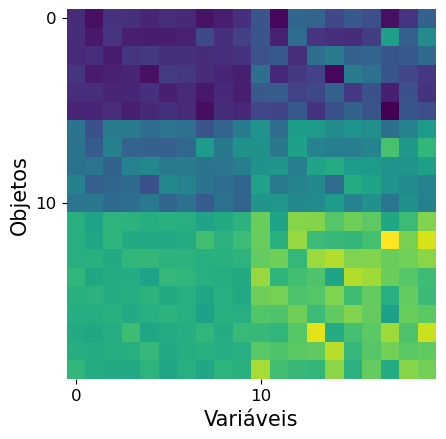

In [51]:
# Generating a simple data set for application demonstration with the GKFDK, GKFDK-GP, and GKFDK-LP methods

nK = np.array([6, 5, 9])
pH = np.array([10, 10])

location = np.array([[1, 2], 
                     [3, 4],
                     [5, 6]])

scale = np.array([[0.3, 0.9], 
                  [0.5, 0.6],
                  [0.2, 0.7]])

X,y = generate_data(nK, pH, location, scale, random_state = 26)
gph1 = sns.heatmap(X, cmap = 'viridis',cbar = False, square = True, xticklabels = 10, yticklabels = 10)
plt.xlabel("Variáveis", size=15)
plt.ylabel("Objetos", size=15)
gph1.tick_params(axis='x', labelsize=12)
gph1.tick_params(axis='y', labelsize=12)
gph1.set_yticklabels(gph1.get_yticklabels(), rotation = 0)

In [52]:
# Setting the algorithm's parameter values

K = 3 # Number of object cluters 
H = 2 # Number of variable clusters
m = 1.1 # Fuzziness parameter of objects
n = 1.2 # Fuzziness parameter of variables
sig2_co = sigma2est(X) # Parameter sigma2 

### Aplicando o algoritmo Gaussian Kernel Fuzzy Double K-Means (GKFDK)

In [53]:
rs1 = GKFDK(X = X, K = K, H = H, m = m, n = n,sig2 = sig2_co, random_state = 30)

In [54]:
# Getting the prototype matrix 
rs1['G']

,h=1,h=2
k=1,3.046517,4.038769
k=2,1.014768,2.023980
k=3,5.029265,6.002002


In [55]:
# Getting the menbership matrix of the objects
rs1['U']

,k=1,k=2,k=3
0,9.261224e-12,1.000000e+00,3.958083e-15
1,1.308322e-07,9.999999e-01,4.968405e-11
2,5.069148e-10,1.000000e+00,2.336581e-14
3,1.524897e-09,1.000000e+00,6.567549e-13
4,3.556568e-13,1.000000e+00,1.783963e-16
5,8.107206e-13,1.000000e+00,3.689083e-16
6,1.000000e+00,2.455748e-12,7.322654e-13
7,1.000000e+00,3.021278e-09,1.104170e-08
8,1.000000e+00,1.288137e-13,8.260089e-12
9,1.000000e+00,1.207379e-10,6.525667e-11


In [56]:
# Getting the menbership matrix of the variables
rs1['V']

,h=1,h=2
0,1.000000,3.224436e-08
1,0.999977,2.273816e-05
2,0.999999,1.321338e-06
3,0.999999,1.270562e-06
4,0.999939,6.130275e-05
5,0.999990,1.040674e-05
6,1.000000,2.623574e-07
7,0.999238,7.617842e-04
8,1.000000,1.311642e-08
9,0.999868,1.320449e-04


In [57]:
# Getting the value of the objective funtion
rs1['J']

0.37018257130722654

In [58]:
# Getting the list of values of the objective function
rs1['Jlist']

[2.9164193724166143,
 1.150691951432416,
 0.6052347044138437,
 0.38624266009285946,
 0.3706007738715471,
 0.37022739274166977,
 0.3701904113390162,
 0.3701843581016035,
 0.37018302346475157,
 0.37018268980442176,
 0.37018260270804904,
 0.37018257965259604,
 0.3701825735217986,
 0.3701825718890874,
 0.3701825714540562,
 0.3701825713381236,
 0.37018257130722654]

### Aplicando o algoritmo Gaussian Kernel Fuzzy Double K-Means on Global Adaptive Distance (GKFDK - GP)

In [59]:
rs2 = GKFDK_GP(X = X, K = K, H = H, m = m, n = n,sig2 = sig2_co, random_state = 30)

In [60]:
# Getting the prototype matrix 
rs2['G']

,h=1,h=2
k=1,3.054968,4.064562
k=2,1.024044,2.076978
k=3,5.011394,6.029417


In [61]:
# Getting the menbership matrix of the objects
rs2['U']

,k=1,k=2,k=3
0,2.172523e-16,1.000000e+00,7.786175e-20
1,4.993584e-14,1.000000e+00,1.351594e-17
2,3.813187e-16,1.000000e+00,4.844885e-20
3,2.429602e-13,1.000000e+00,4.718553e-17
4,2.369657e-19,1.000000e+00,7.330152e-23
5,3.084170e-19,1.000000e+00,9.877122e-23
6,1.000000e+00,1.002987e-14,3.723385e-15
7,1.000000e+00,5.136512e-13,6.791890e-13
8,1.000000e+00,2.045227e-16,2.381383e-15
9,1.000000e+00,8.312259e-13,3.504894e-12


In [62]:
# Getting the menbership matrix of the variables
rs2['V']

,h=1,h=2
0,1.000000,1.936282e-08
1,0.999981,1.879747e-05
2,0.999999,9.843344e-07
3,0.999999,9.606698e-07
4,0.999952,4.822616e-05
5,0.999993,7.359544e-06
6,1.000000,1.746981e-07
7,0.999395,6.046463e-04
8,1.000000,1.018004e-08
9,0.999905,9.506049e-05


In [65]:
# Getting the vector of relevance weights of the variables
rs2['W']

array([7.29154117, 1.04049868, 2.62336785, 2.74998726, 1.09036066,
       1.85944868, 4.42221615, 0.60118077, 6.89485454, 1.27997824,
       1.13072646, 0.33677122, 0.55040352, 0.43883493, 0.23121816,
       0.36292906, 0.9507115 , 0.13776849, 1.40301568, 0.27079608])

In [66]:
# Getting the value of the objective funtion
rs2['J']

0.2195076171324834

In [67]:
# Getting the list of values of the objective function
rs2['Jlist']

[2.9098040763874784,
 1.1365067082347615,
 0.5846423172683627,
 0.26280829586404036,
 0.21993547094163593,
 0.21954329162294184,
 0.2195107019850198,
 0.219507651877208,
 0.21950750684985423,
 0.2195075687807775,
 0.21950760139657716,
 0.21950761258183926,
 0.2195076159058866,
 0.21950761682558706,
 0.21950761706952815,
 0.2195076171324834]

### Aplicando o algoritmo Gaussian Kernel Fuzzy Double K-Means on Local Adaptive Distance (GKFDK - LP)

In [68]:
rs3 = GKFDK_LP(X = X, K = K, H = H, m = m, n = n,sig2 = sig2_co, random_state = 30)

In [69]:
# Getting the prototype matrix 
rs3['G']

,h=1,h=2
k=1,3.068850,4.083559
k=2,1.022895,2.081288
k=3,5.003254,6.022346


In [70]:
# Getting the menbership matrix of the objects
rs3['U']

,k=1,k=2,k=3
0,8.794570e-16,1.000000e+00,1.149391e-21
1,1.090567e-13,1.000000e+00,1.299664e-19
2,1.045927e-15,1.000000e+00,3.909768e-22
3,1.536053e-12,1.000000e+00,7.301222e-19
4,3.880806e-19,1.000000e+00,4.937772e-25
5,7.060383e-19,1.000000e+00,1.290239e-24
6,1.000000e+00,7.095209e-17,6.984135e-18
7,1.000000e+00,6.923921e-15,3.299024e-15
8,1.000000e+00,3.631069e-18,1.348838e-17
9,1.000000e+00,1.787252e-14,1.964918e-14


In [71]:
# Getting the menbership matrix of the variables
rs3['V']

,h=1,h=2
0,1.000000,8.941637e-09
1,0.999998,2.348323e-06
2,1.000000,1.091690e-07
3,0.999999,5.141145e-07
4,0.999989,1.068259e-05
5,0.999998,1.552508e-06
6,1.000000,1.177058e-08
7,0.999841,1.588617e-04
8,1.000000,1.532951e-09
9,0.999984,1.570930e-05


In [72]:
# Getting the matrix of relevance weights of the variables
rs3['W']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
k=1,5.302688,0.556606,1.423939,1.847794,0.610805,1.080834,2.458952,0.369277,3.692094,0.729612,3.076543,0.445155,0.822559,1.066652,0.361997,0.627068,1.421962,0.226533,2.127471,0.426595
k=2,10.452911,1.502833,3.843351,3.688971,1.626236,2.643801,6.217374,0.686509,10.435545,1.845282,1.013825,0.243077,0.362502,0.346003,0.169000,0.257276,0.596973,0.086380,0.969563,0.189089
k=3,6.098255,2.516642,5.791056,2.554021,1.859540,3.001088,11.151278,1.118260,12.968635,2.321499,0.428613,0.225151,0.394438,0.185414,0.134563,0.208374,0.779549,0.090251,0.885379,0.170579


In [73]:
# Getting the value of the objective funtion
rs3['J']

0.19465504380018422

In [74]:
# Getting the list of values of the objective function
rs3['Jlist']

[2.9154269933400228,
 1.0655445568616666,
 0.5623430304661042,
 0.43174652342027287,
 0.22278765796307642,
 0.19557009450429763,
 0.19477977859594175,
 0.19467705292293744,
 0.1946598102887513,
 0.19465622897131613,
 0.194655362036535,
 0.19465513279472418,
 0.19465506921825745,
 0.19465505113619574,
 0.1946550459233067,
 0.19465504440910036,
 0.19465504396731548,
 0.19465504383806606,
 0.19465504380018422]